In [16]:
from itertools import product

import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.model_selection import StratifiedKFold

import matplotlib.pyplot as plt

In [2]:
# the four different states of the XOR gate
training_data = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")

# the four expected results in the same order
target_data = np.array([[0],[1],[1],[0]], "float32")

model = Sequential()
model.add(Dense(16, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])

model.fit(training_data, target_data, epochs=500, verbose=0)

print(model.predict(training_data))
print(model.predict(training_data).round())

[[ 0.36740309]
 [ 0.67591524]
 [ 0.68596506]
 [ 0.30799776]]
[[ 0.]
 [ 1.]
 [ 1.]
 [ 0.]]


In [40]:
covar = [[0.1, 0],[0, 0.1]]
points = 500

a = np.random.multivariate_normal([0,0],covar,points)
b = np.random.multivariate_normal([0,1],covar,points)
c = np.random.multivariate_normal([1,0],covar,points)
d = np.random.multivariate_normal([1,1],covar,points)

noisy_training_data = np.concatenate((a, b, c, d), axis=0)
noisy_target_data = np.concatenate((np.zeros(points), np.ones(points), np.ones(points), np.zeros(points)))

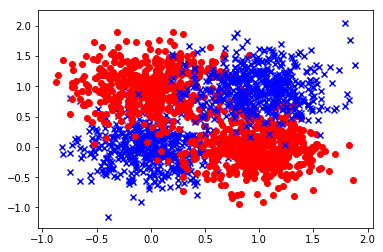

In [41]:
x, y = zip(*a)
plt.scatter(x, y, color='b', marker='x')

x, y = zip(*b)
plt.scatter(x, y, color='r', marker='o')

x, y = zip(*c)
plt.scatter(x, y, color='r', marker='o')

x, y = zip(*d)
plt.scatter(x, y, color='b', marker='x')
plt.show()

In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True)
cvscores = []
losses = []

for train, test in kfold.split(noisy_training_data, noisy_target_data):
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])
    # Fit the model
    model.fit(noisy_training_data[train], noisy_target_data[train], epochs=150, batch_size=10, verbose=0)
    # evaluate the model
    scores = model.evaluate(noisy_training_data[train], noisy_target_data[train], verbose=1)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    print("%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
    cvscores.append(scores[1] * 100)
    losses.append(scores[0] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
print("%.2f%% (+/- %.2f%%)" % (np.mean(losses), np.std(losses)))

1600/1600 [==============================] - 0s 69us/step
binary_accuracy: 88.81%
loss: 8.25%
1600/1600 [==============================] - 0s 105us/step
binary_accuracy: 88.50%
loss: 8.57%


In [ ]:
grid = np.array(list(product(np.linspace(0, 1, num=100), np.linspace(0, 1, num=100))))
preds = model.predict(grid).round()

x, y = zip(*grid)

plt.scatter(x, y, c=preds.flatten())
plt.show()